# Lending Club Case Study

# Introduction:
- Develop a basic understanding of risk analytics in banking and financial services.
- Understand how data is used to minimise the risk of losing money while lending to customers.

# Objectives 

- Identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
- Driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [768]:
# Steps of analysis:
# Data Exploration: Understand data characteristics, identify patterns, and uncover potential issues.
# Data Preparation: Cleanse, transform, and structure data for analysis.
# Communication and Action: Visualize findings, communicate results, and recommend actions.

## Loading necessary libs

In [771]:
#importing Libraries for data manipulation
import pandas as pd 
import numpy as np

#importing Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting

# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

In [773]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
loan_data = pd.read_csv('loan.csv')
data_dict = pd.read_excel('Data_Dictionary.xlsx')

In [775]:
# Printing the data(first 5 rows)
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Basic information regarding the data

In [777]:
#Basic information about the data
## Number of rows and columns
print('Total Number of Columns:',loan_data.shape[1])
print('Total Number of Rows:',loan_data.shape[0])

## Total missing values
print('Total missing values:',loan_data.isnull().sum().sum())

## Total unique values
print('Total unique values:',loan_data.nunique().sum())

## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())

Total Number of Columns: 111
Total Number of Rows: 39717
Total missing values: 2263366
Total unique values: 416800
Number of duplicates: 0


In [779]:
loan_data.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

## Check for NULL values:

In [782]:
# Check for columns with large amount of null values in percentage
print((loan_data.isnull().sum()/loan_data.shape[0]*100).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


## View columns having High NULL values

In [785]:
# Calculate the percentage of null values in each column
null_percent = loan_data.isnull().sum() / len(loan_data) * 100

# Filter columns with more than 70% null values
high_null_cols = null_percent[null_percent > 70]

print(high_null_cols)

mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_tl                       100.000000
inq_last_1

In [787]:
# Get columns with more than 70% null values
cols_to_drop = null_percent[null_percent >= 70].index

# Drop the columns
loan_filter = loan_data.drop(cols_to_drop, axis=1)

In [789]:
# Shape of the dataframe after removing columns
print(loan_filter.shape)

(39717, 55)


In [791]:
# Checking columns again for null value percentage
print((loan_filter.isnull().sum()/loan_filter.shape[0]*100).sort_values(ascending=False))

mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_acc                      0.000000
total_pymnt_inv                0.000000
recoveries                     0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
pub_rec                        0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000


In [793]:
# Still 'mths_since_last_delinq' is having more than 60% Null data.
# So removing this column as well
loan_filter = loan_filter.drop('mths_since_last_delinq', axis=1)

In [795]:
# Check Shape again. 
print(loan_filter.shape)

(39717, 54)


In [797]:
# Checking columns again for null value percentage
print((loan_filter.isnull().sum()/loan_filter.shape[0]*100).sort_values(ascending=False))

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


In [799]:
# Count rows with all null values
all_null_count = loan_filter.isna().all(axis=1).sum()

print(all_null_count)

0


In [801]:
# Count rows with any null values
print((loan_filter.isnull().sum(axis=1)).max())

6


## Results:

- We have removed columns with more than 60% NULL values.
- Row wise we do not have any row having all NULL values.
- There are only 6 Rows which contain few NULL values.

## View Columns and Remove un-necessary columns and rows

In [805]:
print(loan_filter.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


- Some columns correspond to the post approval of loan, which do not contribute to our analysis.
- Some columns does not attribute to loan default analysis
- Some columns are duplicate like id and member_id

In [808]:
loan_filter=loan_filter.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
loan_filter=loan_filter.drop(['title','emp_title','desc','url','zip_code','member_id','funded_amnt_inv'],axis=1)


In [810]:
# Check Shape again. 
print(loan_filter.shape)

(39717, 26)


In [812]:
# Check columns 
print(loan_filter.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')


In [814]:
# Checking for Unique values
print(loan_filter.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [816]:
# Deleting the columns values having unique value 1
for column in loan_filter.columns:
    if loan_filter[column].nunique(dropna=True) == 1:
        print(column)
        loan_filter = loan_filter.drop(column, axis=1)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [818]:
# Checking for Unique values
print(loan_filter.nunique().sort_values(ascending=True))

term                        2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
installment             15383
id                      39717
dtype: int64


In [820]:
# Check Shape again. 
print(loan_filter.shape)

(39717, 18)


In [822]:
# Check for unnecessary rows
loan_filter['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [824]:
# Remove the Current loan data as it can not amount to analysis
loan_filter= loan_filter[loan_filter['loan_status']!='Current']

In [826]:
# Check Shape again. 
print(loan_filter.shape)

(38577, 18)


In [828]:
# Removing duplicate rows in the dataframe
loan_filter = loan_filter.drop_duplicates()

In [830]:
# Check Shape again. 
print(loan_filter.shape)

(38577, 18)


In [832]:
loan_filter.head(5)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


## Check for Data Types and Data Conversion

In [835]:
loan_filter.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [837]:
# Correctting the data types
loan_filter.term=loan_filter.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_filter.int_rate=loan_filter.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

In [839]:
(loan_filter.isnull().sum()*100)/len(loan_filter)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [841]:
# Dropping the rows with null values
loan_filter= loan_filter[loan_filter['emp_length'].notna()]
loan_filter= loan_filter[loan_filter['pub_rec_bankruptcies'].notna()]

In [843]:
#Check for null values again
(loan_filter.isnull().sum()*100)/len(loan_filter)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [845]:
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_filter['emp_length']=loan_filter['emp_length'].apply(lambda x : strip_emp_length(x) )

In [847]:
loan_filter.issue_d=pd.to_datetime(loan_filter.issue_d,format='%b-%y')

In [849]:
# Adding New Columns
loan_filter['issue_year']=pd.to_datetime(loan_filter.issue_d,format='%b-%y').dt.year
loan_filter['issue_month']=pd.to_datetime(loan_filter.issue_d,format='%b-%y').dt.month

In [851]:
# Rounding off the belows to two decimals points.
for data in ['loan_amnt', 'funded_amnt', 'int_rate', 'dti']:
    loan_filter[data] = loan_filter[data].apply(lambda x: round(x,2))
    print(loan_filter[data])

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39562     4800
39573     7000
39623     9000
39666    15450
39680     3000
Name: loan_amnt, Length: 36847, dtype: int64
0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39562     4800
39573     7000
39623     9000
39666    15450
39680     3000
Name: funded_amnt, Length: 36847, dtype: int64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 36847, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39562     7.51
39573     8.50
39623     5.08
39666    13.50
39680     7.47
Name: dti, Length: 36847, dtype: float64


## Checking and Removing the Outliers

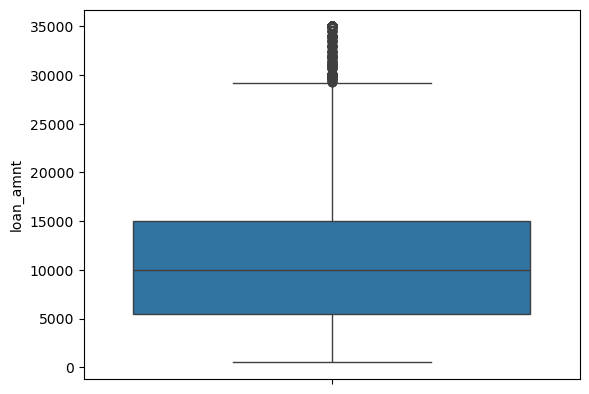

In [854]:
sns.boxplot(loan_filter['loan_amnt'])
plt.show()

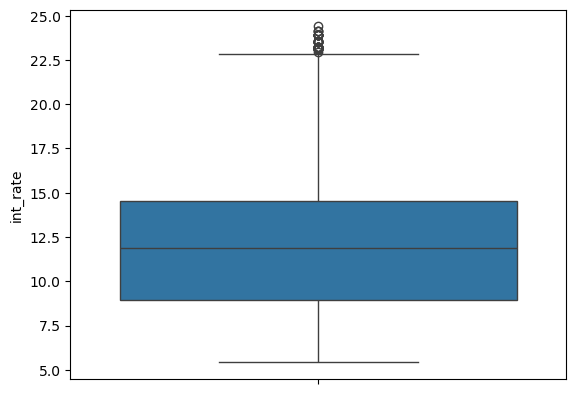

In [856]:
sns.boxplot(loan_filter['int_rate'])
plt.show()

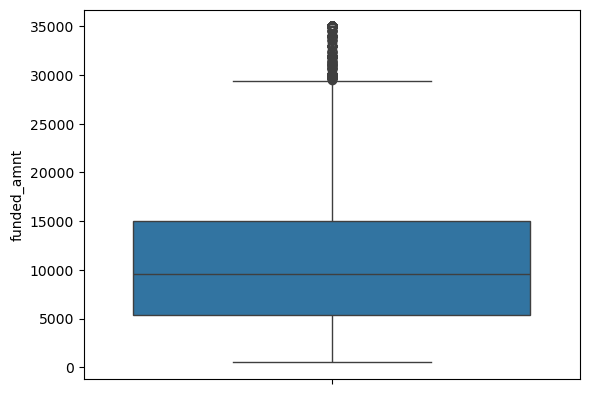

In [858]:
sns.boxplot(loan_filter['funded_amnt'])
plt.show()

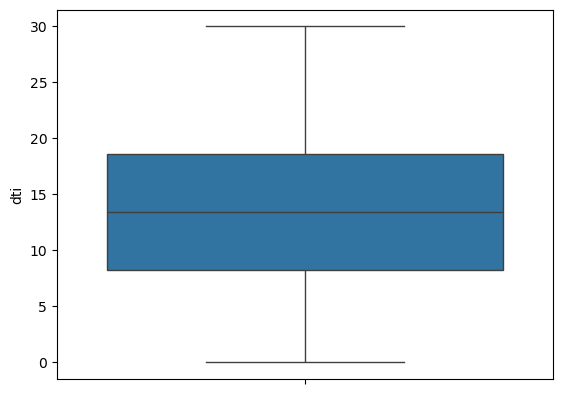

In [860]:
sns.boxplot(loan_filter['dti'])
plt.show()

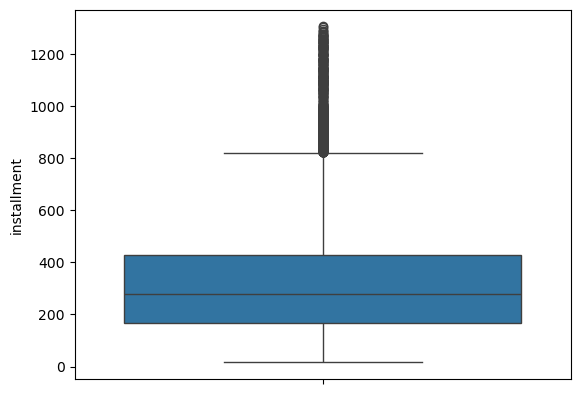

In [862]:
sns.boxplot(loan_filter['installment'])
plt.show()

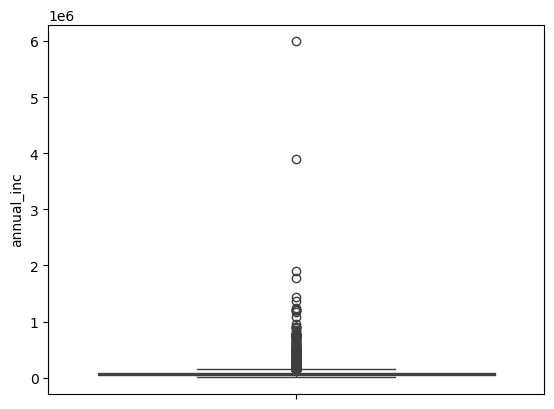

In [864]:
sns.boxplot(loan_filter['annual_inc'])
plt.show()

In [866]:
# Removing the outliers
outliers= ['loan_amnt', 'funded_amnt','int_rate', 'installment', 'annual_inc']

# Function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_filter =remove_outliers_iqr(loan_filter, outliers,1.5)

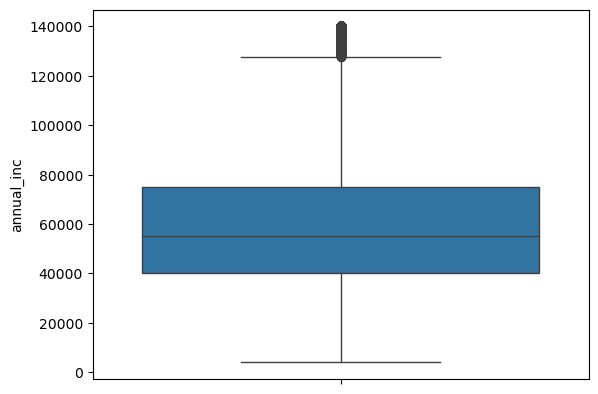

In [868]:
sns.boxplot(loan_filter['annual_inc'])
plt.show()

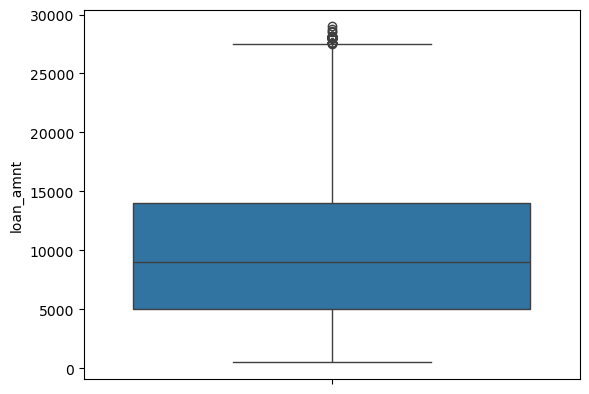

In [870]:
sns.boxplot(loan_filter['loan_amnt'])
plt.show()

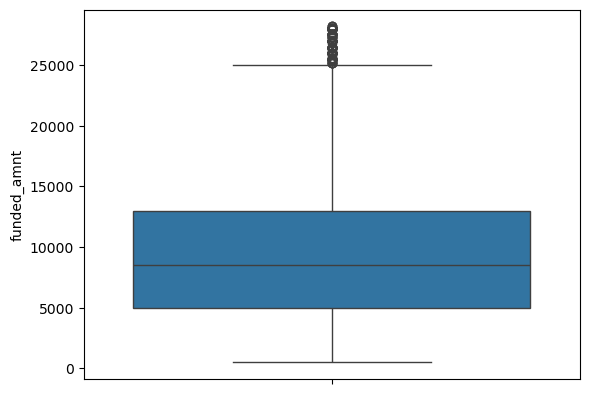

In [872]:
sns.boxplot(loan_filter['funded_amnt'])
plt.show()

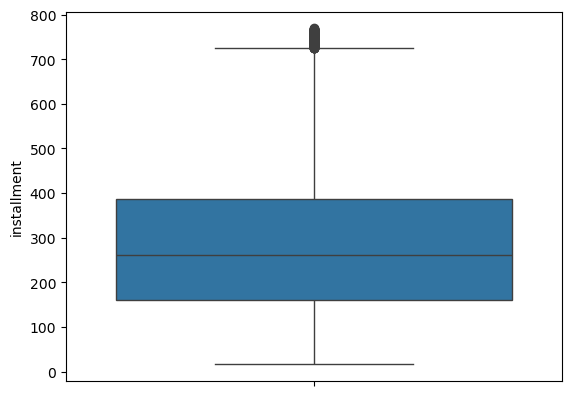

In [874]:
sns.boxplot(loan_filter['installment'])
plt.show()

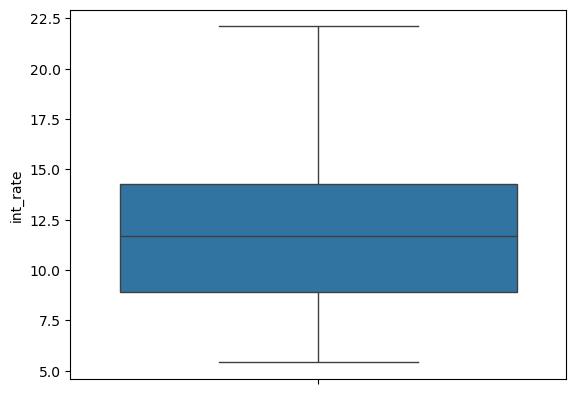

In [876]:
sns.boxplot(loan_filter['int_rate'])
plt.show()

In [5]:
# We have removed Outliers based on the IQR range. 
# Most of the outliers are near to upper fence now and won't have much impact on analysis.
# Having addressed data quality issues, the dataset is now prepared for in-depth exploratory analysis.

## Univariate Analysis

In [1]:
# Utility function to plot dist and box plot
def plot_digram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0],bins=20)
    sns.boxplot(x=column, data=df, ax=p[1])
    plt.tight_layout()
    plt.show()

<Axes: xlabel='loan_status', ylabel='count'>

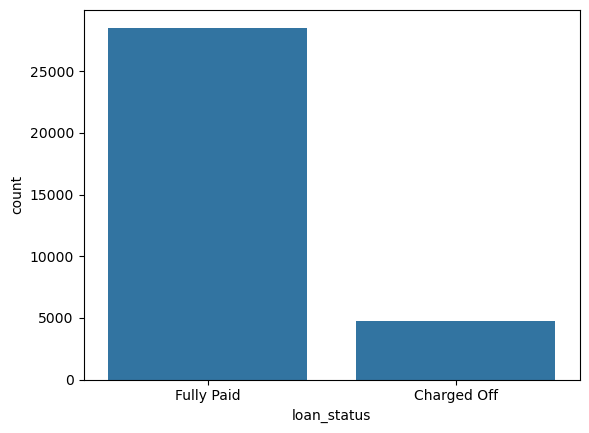

In [883]:
sns.countplot(x = 'loan_status', data = loan_filter)

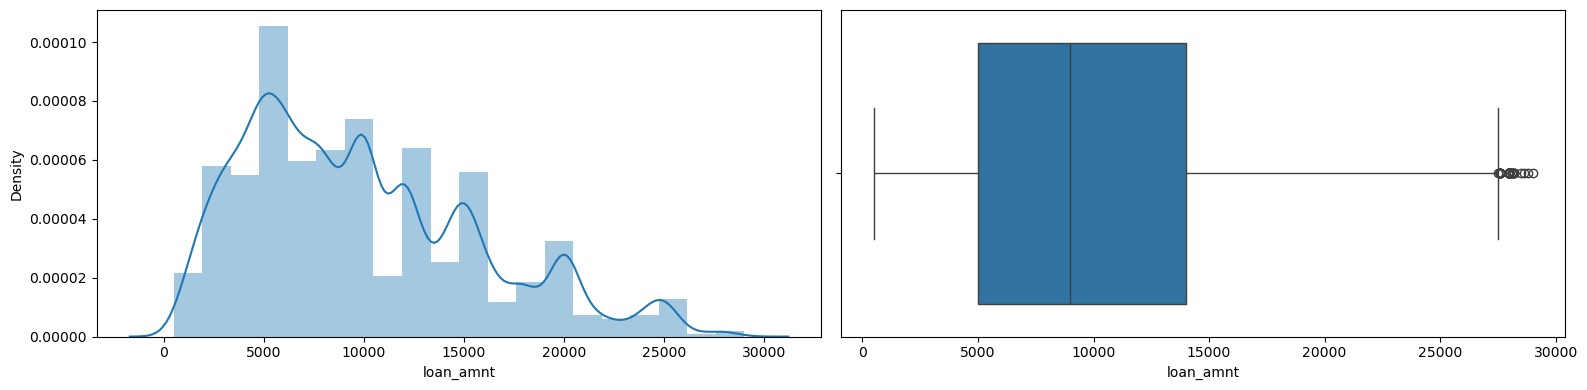

count    33272.000000
mean      9863.045504
std       5865.704869
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [885]:
plot_digram(loan_filter, 'loan_amnt')
loan_filter['loan_amnt'].describe()

### Observations: 
- Most applicants have applied for loan between 5k  to 14 K
- Defaulters are less compared to fully paid loans

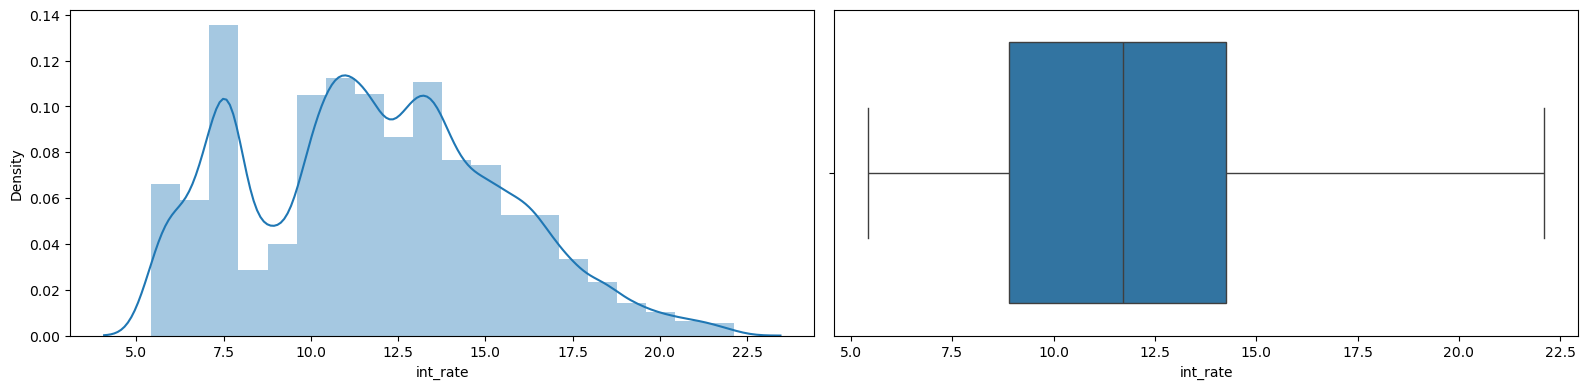

count    33272.000000
mean        11.791514
std          3.596809
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [888]:
plot_digram(loan_filter, 'int_rate')
loan_filter['int_rate'].describe()

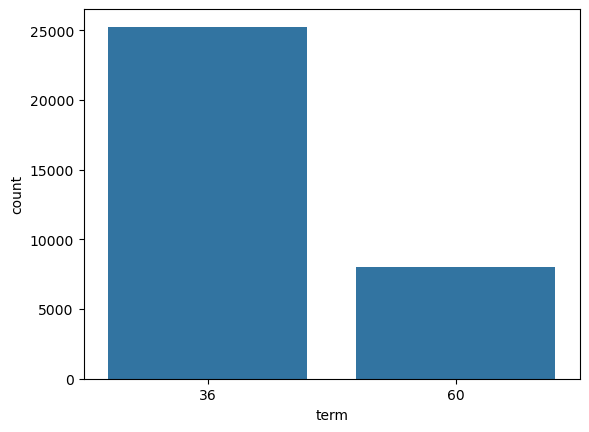

In [890]:
sns.countplot(x = 'term', data = loan_filter)
plt.show()

### Observations:
- Most applicants have interest rate between 8.9 to 14.26 and avg Interest Rate is 11.79 %
- Most applicants have opted for 36 months tenure

<Axes: xlabel='purpose'>

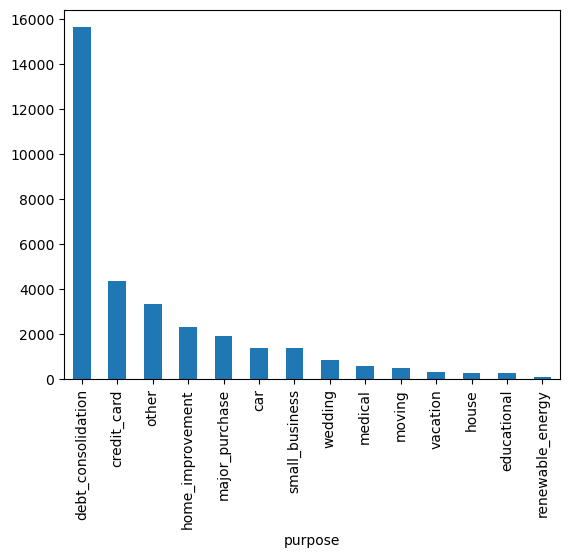

In [893]:
loan_filter['purpose'].value_counts().plot.bar()

<Axes: xlabel='home_ownership'>

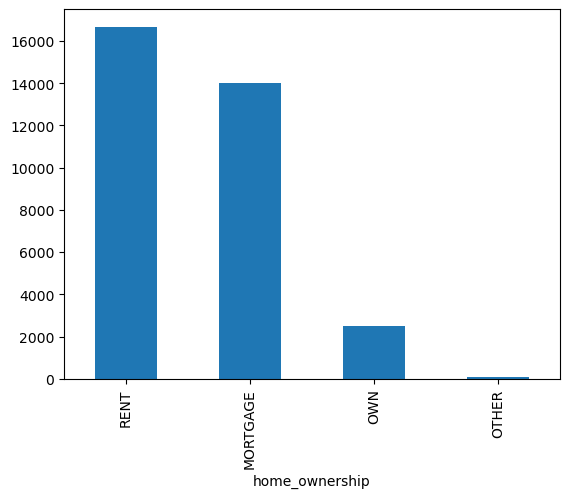

In [895]:
loan_filter['home_ownership'].value_counts().plot.bar()

### Observations:
- Majority of applicants have taken loan for debt consolidation.
- Most loan applicants do not own their property

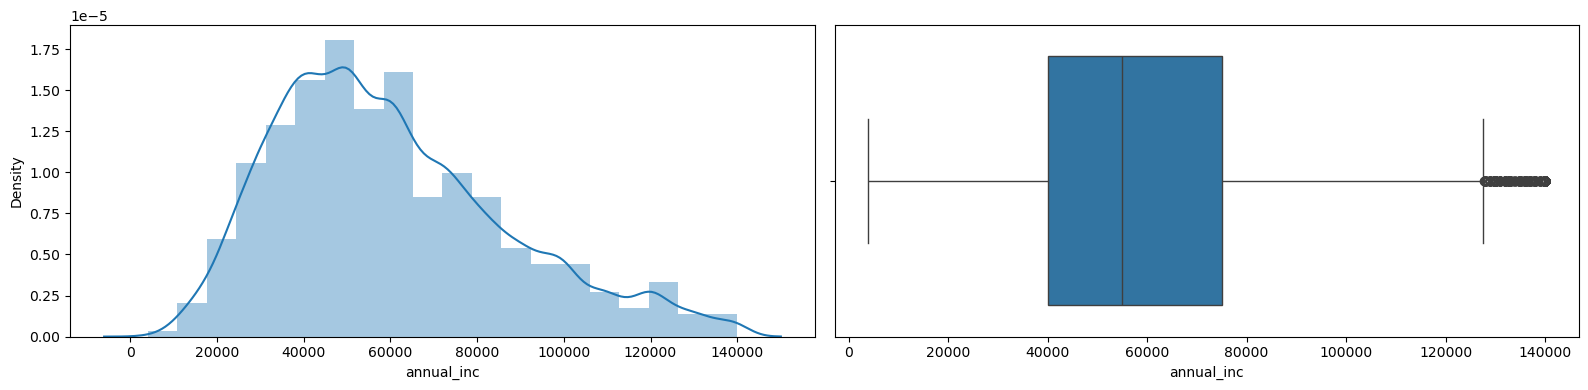

count     33272.000000
mean      59942.400711
std       26936.491344
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [898]:
plot_digram(loan_filter, 'annual_inc')
loan_filter['annual_inc'].describe()

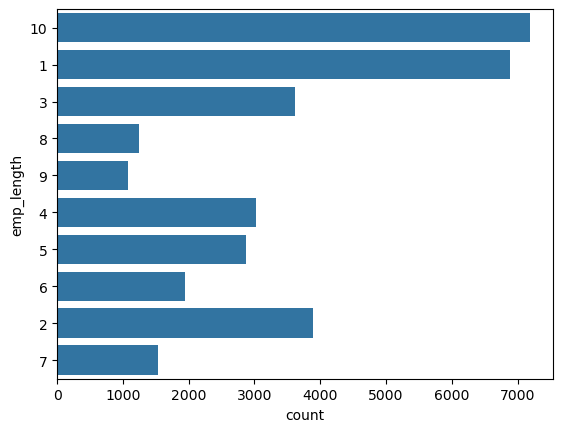

In [900]:
# Distribution of emp_length
sns.countplot(loan_filter.emp_length)
plt.show()

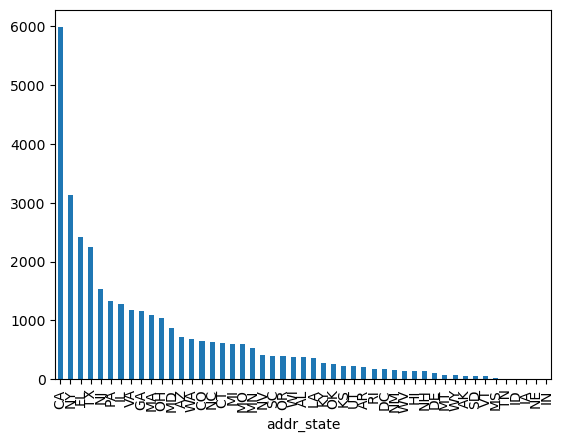

In [902]:
# Distribution of addr_sta
loan_filter['addr_state'].value_counts().plot(kind="bar")
plt.show()

### Observations:
- Most loan applicants have annual income between 40k to 80 K
- People having employment length 10 or more are highest borrowers.
- Most loan applicants are from CA

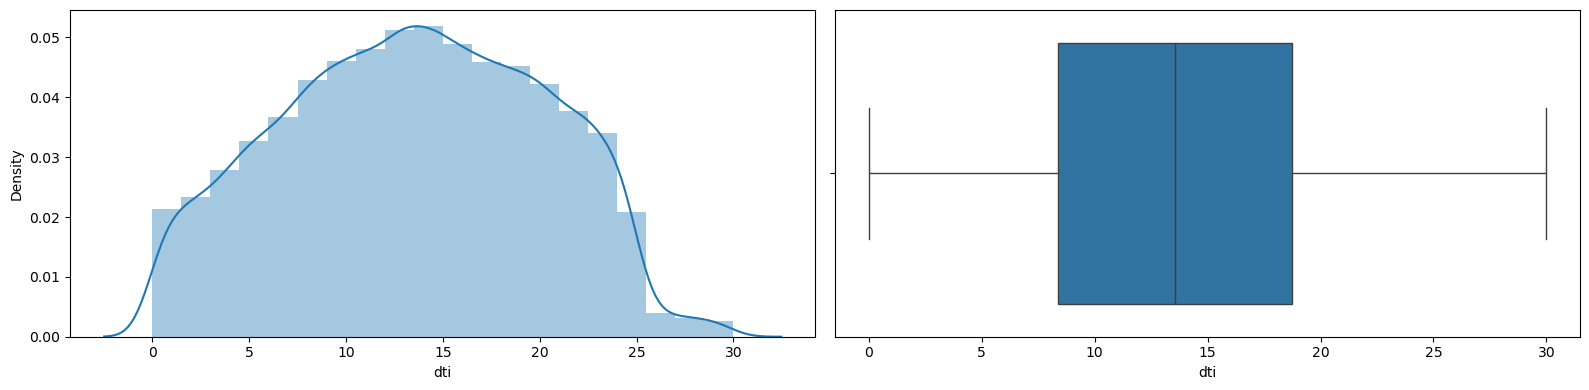

count    33272.000000
mean        13.466700
std          6.651557
min          0.000000
25%          8.370000
50%         13.570000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

In [905]:
plot_digram(loan_filter, 'dti')
loan_filter['dti'].describe()

<Axes: xlabel='pub_rec_bankruptcies'>

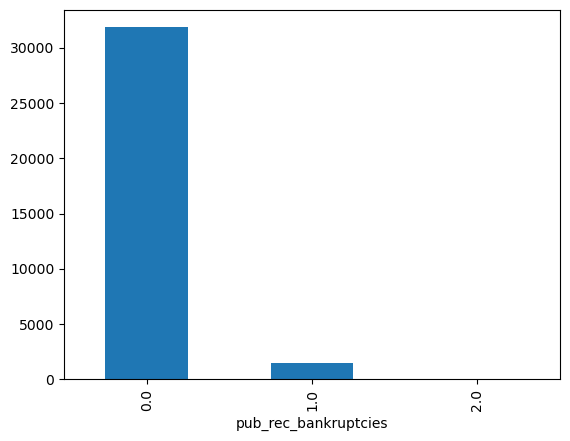

In [907]:
loan_filter.pub_rec_bankruptcies.value_counts().plot(kind='bar')

### Observations:
- Most borrowers have no public record of bankruptcies.
- Most applicants have large debt to income ratio.

## Bivariate analysis

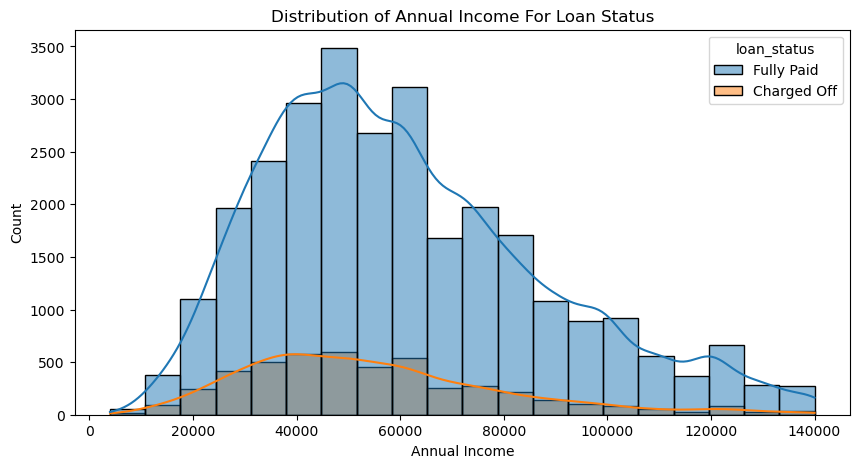

In [911]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_filter,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

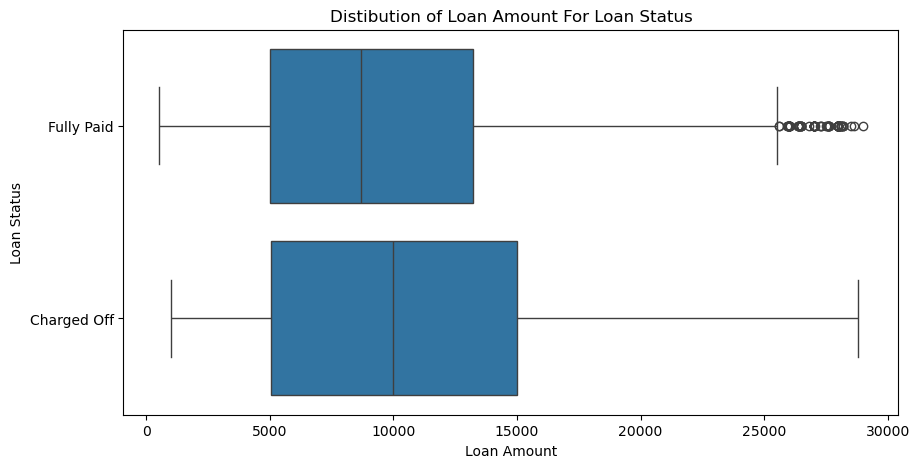

In [913]:
# Distribution of Loan amount
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_filter,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

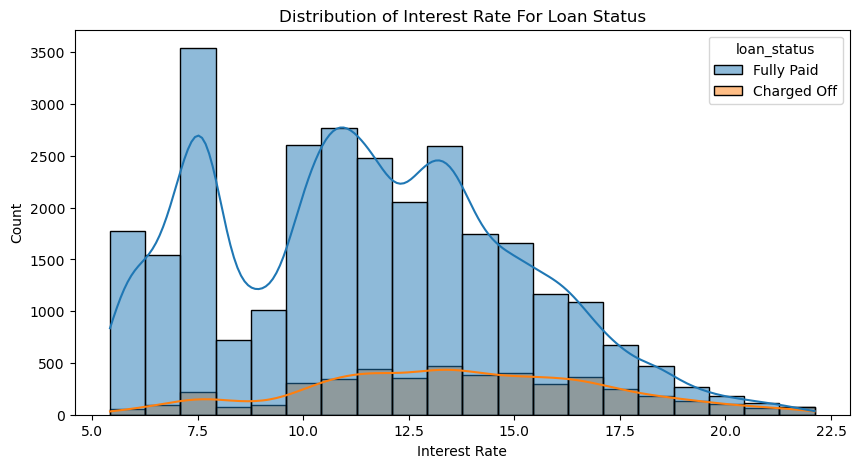

In [915]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_filter,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

### Observations:
- Applicants having income in range 0-40 K are more likely to default.
- Larger the loan amount, greater the chances of default.
- Applicants with Interest Rate betwen 10% to 15% are more likely to default

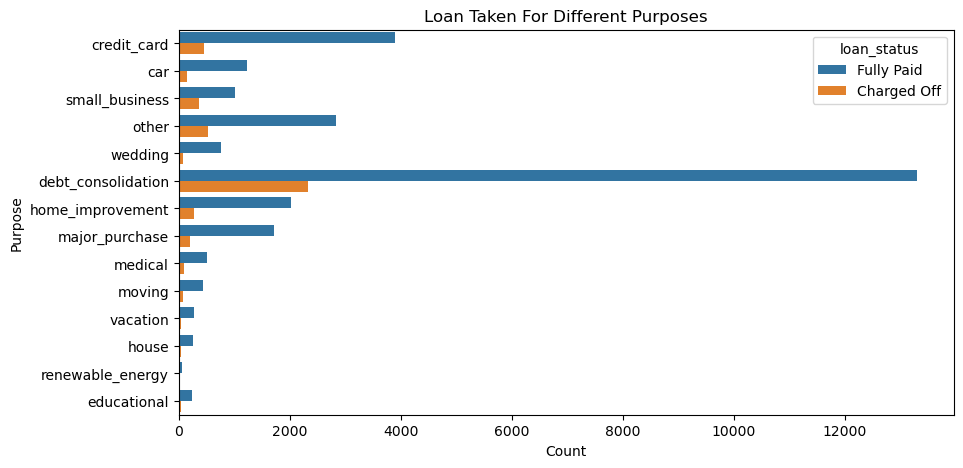

In [918]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_filter,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

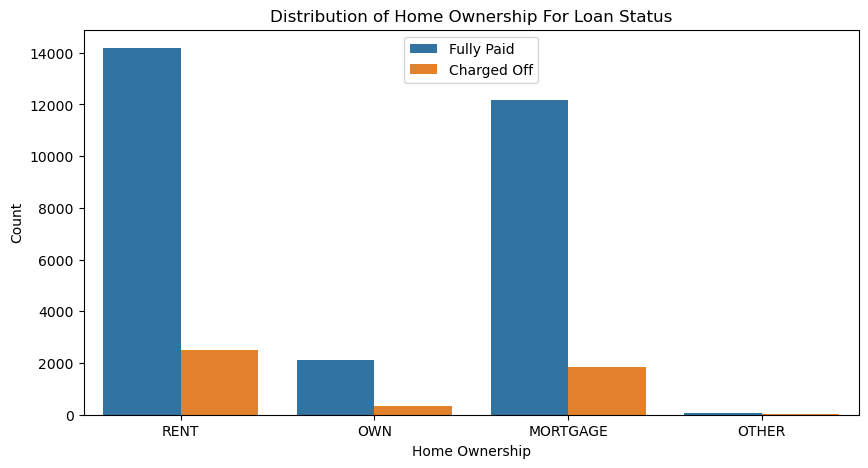

In [920]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_filter,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

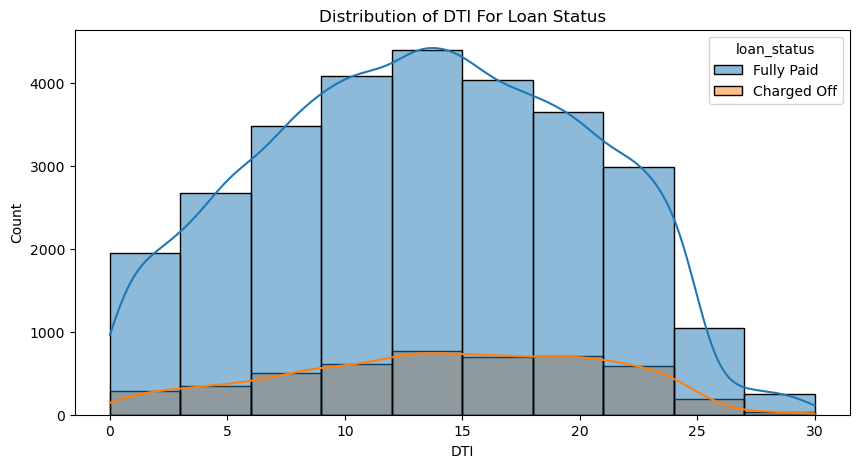

In [922]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_filter,x='dti',hue='loan_status',bins=10,kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

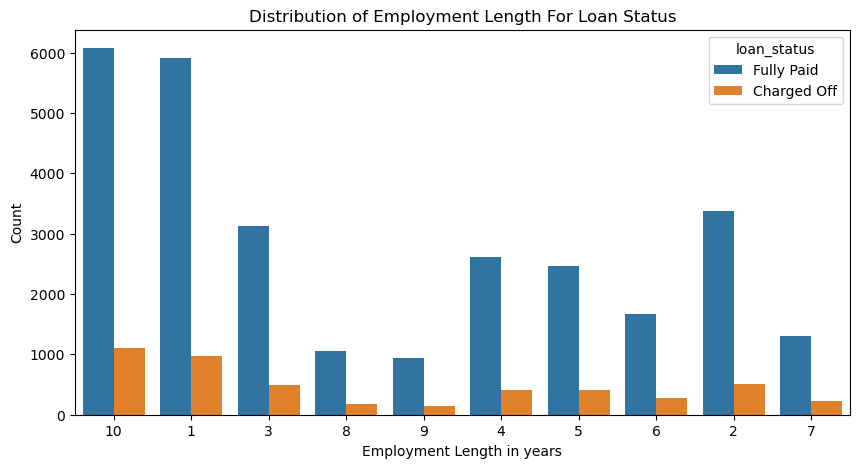

In [924]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_filter,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

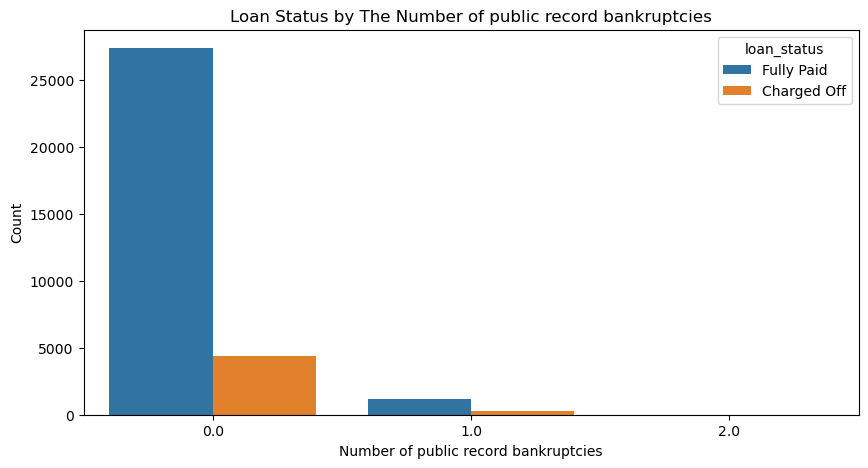

In [926]:
# Comparison of public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_filter,x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Count')
plt.title('Loan Status by The Number of public record bankruptcies',fontsize=12)
plt.show()

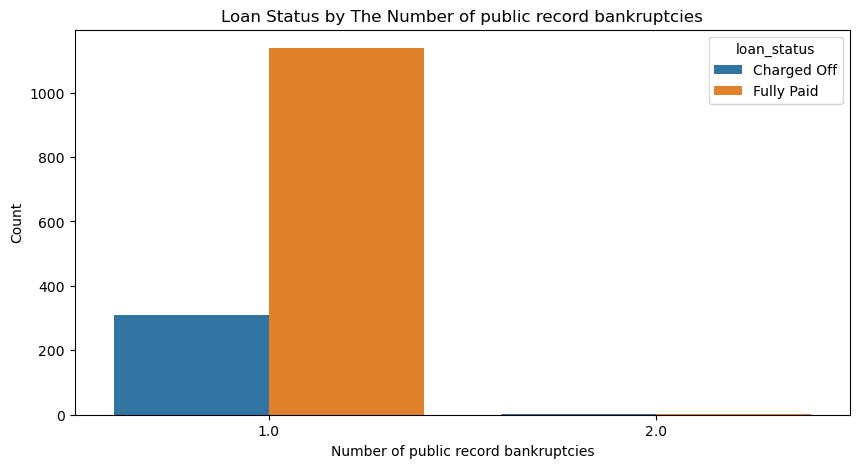

In [928]:
# Separating and visualising applicants having 1.0 or 2.0 bankruptcy records
bank_rp = loan_filter[(loan_filter.pub_rec_bankruptcies == 1.0) | (loan_filter.pub_rec_bankruptcies == 2.0)]

plt.figure(figsize=(10,5))
sns.countplot(data=bank_rp,x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Count')
plt.title('Loan Status by The Number of public record bankruptcies',fontsize=12)
plt.show()


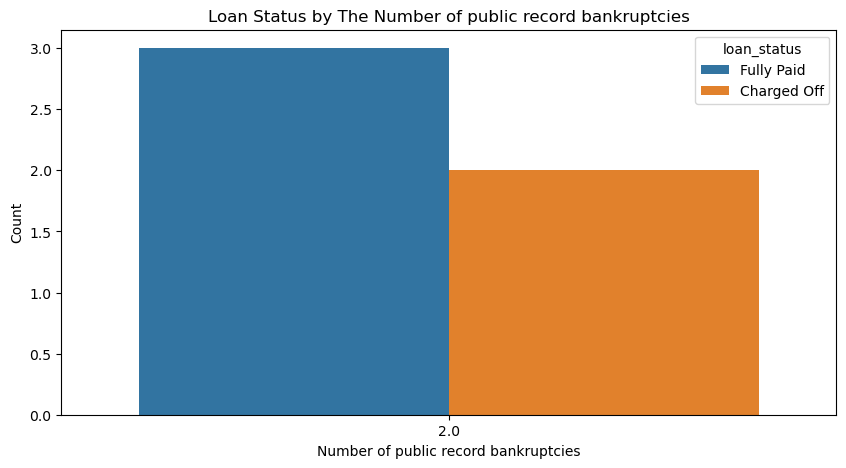

In [930]:
# Separating and visualising applicants having 2.0 bankruptcy records
bank_rp1 = loan_filter[loan_filter.pub_rec_bankruptcies == 2.0]

plt.figure(figsize=(10,5))
sns.countplot(data=bank_rp1,x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Count')
plt.title('Loan Status by The Number of public record bankruptcies',fontsize=12)
plt.show()

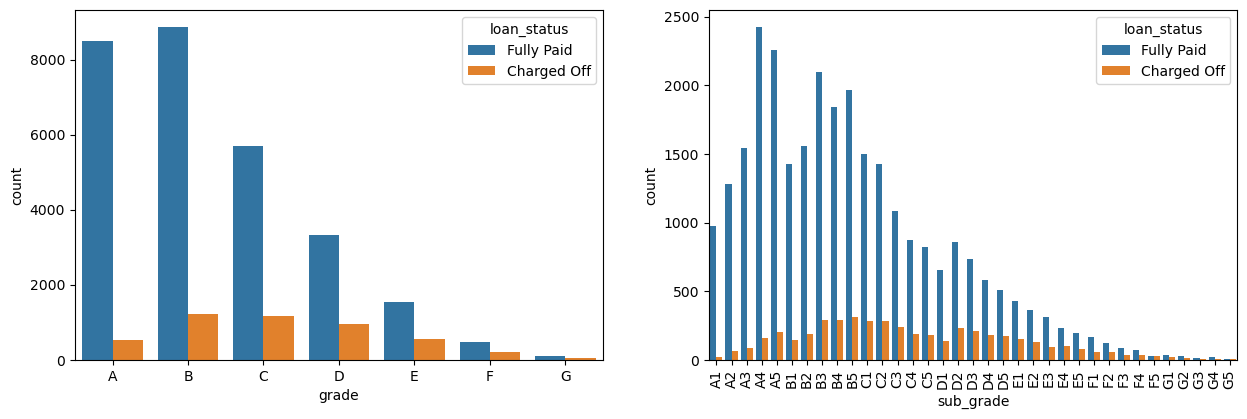

In [932]:
# Comparison of grade and sub-grade over loan status
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
grade = sorted(loan_filter.grade.unique().tolist())
sns.countplot(x='grade', data=loan_filter, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(loan_filter.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=loan_filter, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<Axes: xlabel='sub_grade', ylabel='count'>

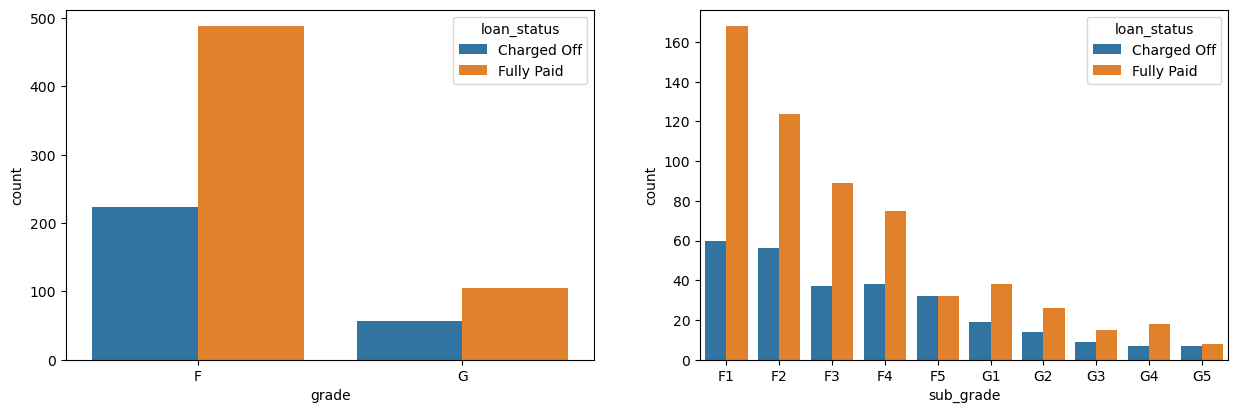

In [934]:
# Looks like Grade F and G are less likely to be paid.
# Separating and visualising F and G grades.
loan_gf = loan_filter[(loan_filter.grade == 'F') | (loan_filter.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(loan_gf.grade.unique().tolist())
sns.countplot(x='grade', data=loan_gf, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(loan_gf.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=loan_gf, hue='loan_status', order=sub_grade)

### Observations:
- People who take loan for debt consolidation are likely to charged of.
- People not having their own property are likely to charged of.
- Data shows high defaulters betweeen 10 to 20 DTI range but High DTI has high charged off chances.
- Maybe High DTI applicants are rejected initially, so we have a few instances in the data.
- Applicants with more than 10 years of expirenece have high default and as well paid cases.
- Applicants with bankruptcies records are more likely to be charged of.
- Grade and F and G type of loan are more likely to be charged of.

In [937]:
# Drop Columns for correlation
drop_columns = ['grade', 'sub_grade','purpose','addr_state','home_ownership','verification_status','issue_d','loan_status']
corr_loan = loan_filter.drop(columns=drop_columns)

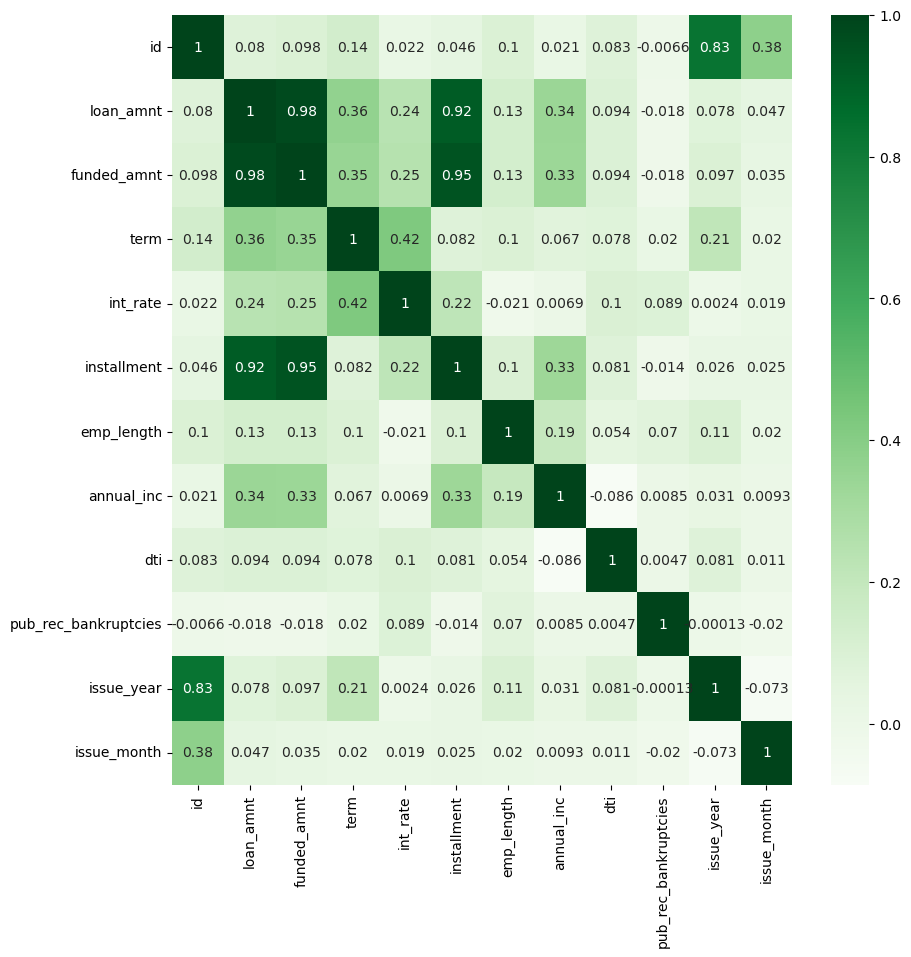

In [941]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(corr_loan.corr(),annot=True,cmap='Greens')
plt.show()

### Correlation Observations:
- Loan amount and annual income have positive correlation.
- Bankruptcies have negative correlation with loan amount.
- Funded amount has negative correlation with Bankruptcies.
- Loan amount and installments are highly positively correlated.
- Employement length has postive correlation with annual income.

**Driving Factors for Loan Defaults:**

1. **Income Level:** 
   - Applicants with annual incomes in the range of **$0 - $40K** are more likely to default compared to those earning between **$40K - $80K**.

2. **Employment Stability:**
   - Those with **10 or more years of employment** have a higher likelihood of borrowing, indicating stability, but paradoxically, they also show a significant risk of default.

3. **Loan Amount:**
   - There is a clear trend where **larger loan amounts** correlate with a higher probability of default.

4. **Interest Rates:**
   - Applicants with **interest rates between 10% and 15%** exhibit a greater tendency to default.

5. **Purpose of Loan:**
   - Individuals taking loans for **debt consolidation** are more frequently associated with defaults.

6. **Property Ownership:**
   - **Applicants without their own property** are more likely to default, suggesting that home ownership may serve as a financial safety net.

7. **Debt-to-Income Ratio (DTI):**
   - High default rates are observed within the **10 to 20 DTI range**, although individuals with very high DTI ratios may have been filtered out beforehand or rejected prior to application.

8. **Bankruptcy History:**
   - Individuals with **bankruptcy records** are significantly more likely to default on loans.

9. **Loan Grades:**
   - Loans graded **F and G** have a higher propensity for defaults, indicating that lower-quality loans carry greater risk.

### Conclusion
Income, employment stability, loan amount, interest rate, property ownership, debt, and credit history are key determinants of loan default risk. Larger loans, higher interest rates, and borrowers with lower incomes or poor credit profiles pose greater challenges. Lenders can leverage these insights to refine underwriting models and risk management strategies.